# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: <br/>The goal is to see if there are customer attributes and usage that correlate to spending habits.  First the general trends of the data will be determined, the number of rows, summary stastics, the interquartile  range, and the distribution of the data. Once general trends of the data are explored will implement further data analysis of the customer variables to explore possible relationships with the predictors to influce customer spending. 

#### 2. What are the predictors/covariates? 

$Y$ = $B_0$ + $B_1X$

Answer:<br/> The covariates, or independent variables are the attributes of the customers, their, age, gender, location, and profession, and last log in. These variables possibly influence the predictor - wich is the customer converting converting from a free-tier customer to a paying customer. I am assuming that paying customer corresponds to an activity score of 1 and free-tier customers corresponds to an activity score of 0. $B_1$X are the covariates and $y$ is the dependent variable. $Y$ is the activity score.

#### 3. What timeframe is this data relevent for?

Answer: <br/>January to April 2015. The data could still be _relevant_ for today, but eventually will be too outdated to make business decisions from expecially as the internet changes thus ways people interact with the internet and how they spend online changes. Also more importantly as product of the company changes new analysis will be needed

#### 4. What is the hypothesis?

$H_0$

Answer: <br/>Hypothesis: The less time since a customer last logged in, the more likely the customer will convert to a paying customer. Decrease in time since last log in correlates to higher instances of activity score = 1.

## Let's get started with our dataset

ok!

In [6]:
!pwd

/c/Users/Amber/Documents/GitHub/DataSciCourse/projects/unit-projects/project-1/starter-code


In [6]:
df = pd.read_csv("../../project-1/assets/admissions.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# !pip install pandas --upgrade

%matplotlib inline

In [7]:
df.head(10)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### 1. Create a data dictionary 

Answer: 

Variable | Summary | Description | Type of Variable | 
---| ---| --- | ---
admit | admitted to UCLA or not | 1 admitted, 0 not admitted | binary
GRE | Graduate Record Examinations - standarized test |integers - range from 200 - 800 | discrete*
GPA | Grade Point Average - summation rank of course grades  |floats with precision to the hundredths - range from 0.00 to 4.00 | continous
prestige | rank of undergraduates' university | integers 4 to 1 (highest)| ordinal

*although GRE score is technically discrete it will be treated as continuous for the purpose of this study, meaning used for graphs where the x-axis is continuous


#### 2. What is the outcome?

Answer: <br/>Purpose of this study is to explore and describe basic stastical trends of the data then to determine if changes in $X$ lead to predicted outcomes in $Y$

#### 3. What are the predictors/covariates? 

Answer:<br/> $Y$ = $B_0$ + $B_1$$X$ The covariates $B_1$ are **GRE**, **GPA**, and **prestige**. The predictors $Y$ is admittance (**admit**) to the University 

#### 4. What timeframe is this data relevent for?

Answer: <br/>The data here is hypothetical. There is no metadata on dates of this dataset.  Perhaps the timeframe that this data is relevant for is as long as UCLA is around and as long as these covariates are relevant for determining admissions in time of preforming analysis. 

#### 4. What is the hypothesis?

Answer: <br/>
$H_0$<br/>
Higher GRE scores have higher correlation to addmitance to UCLA. Increase in GRE leads to more instances of admit = 1

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [5]:
!pwd

/c/Users/Amber/Documents/GitHub/DataSciCourse/projects/unit-projects/project-1/starter-code


In [16]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [51]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [8]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### 1. What are the goals of the exploratory analysis? 

Answer: <br/>Exploratory analysis allows unbiased exploration of data, to use data mining and statists to allow trends to emerge. Primarly exploratory analysis is to gain a foundation of the data, the overall summations of the dataset. 

#### 2a. What are the assumptions of the distribution of data? 

Answer:<br/> For distribution I assume that there will be a large distribution of GRE and GPA for anyone can apply. I am assuming that the variability will decrease in the covariates when the predictor variable when admissions is equal to 1.  When admissions equals 1 I assume that the distribution will be less, that the data will be more symmetrical, and that the data will have higher kurtosis. 

#### 2b. How will determine the distribution of your data? 

Answer: <br/>The standard deviation and the mean show a peliminary distribution of the data. Normal Distribution chart shows the distribution of the data from the mean, if the data is skewed, and the degree of gravity to the mean.  Detemining the quantiles and interquantile range shows the distribution of the data.   Visualization of this is aided with box-and-wisker plots, histograms, scatter plots, and the bell-curve of the data. <br/>
1 - Standard Deviaiton and the mean <br/>
2 - Check for Outliers <br/>
3 - Determine the Quantiles and Inner Quantile Range <br />
4 - Determine how normal the distribution is, along with skewedness, and kurtosis

In [91]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [9]:
df2 = df.copy()
df3 = df2.dropna()
print df3.shape
print df.shape

(397, 4)
(400, 4)


Here a new dataframe was created that removed the null values out of the dataset and was assigned to a new data frame.  `DataFrame.dropna()` removes the whole row where any column contains a null value.  This ends up removing data from the dataset.  Seen by `DataFrame.shape` only a few records were removed, 3 to be exact.  As seen in summary stastitics of the original data set in `df.describe()` and below in the data set with removed NULL values in `df3.describe()` removal of the null values has very little effect on the mean and standard deviaiton.  Additionally the minimun and maximum values are the same meaning no potential outliers have been removed. 

In [99]:
df3.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [12]:
type(df3.describe())

pandas.core.frame.DataFrame

In [13]:
statsDF = df3.describe()

In [53]:
print float(statsDF[statsDF.index == "75%"].gre) - (statsDF[statsDF.index == "25%"].gre)

25%    140.0
Name: gre, dtype: float64


In [55]:
q75 = statsDF.loc["75%"]
q25 = statsDF.loc["25%"]

IQR = map(lambda (x75, x25): x75 - x25, zip(q75, q25))

IQRindex = {"admit": IQR[0], 
            "gre": IQR[1], 
            "gpa": IQR[2], 
            "prestige": IQR[3 ]}

dfIQR = pd.DataFrame(IQRindex, index = range(1))
statsDF.append(dfIQR)



,admit,gpa,gre,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,3.392242,587.858942,2.488665
std,0.466044,0.380208,115.717787,0.947083
min,0.000000,2.260000,220.000000,1.000000
25%,0.000000,3.130000,520.000000,2.000000
50%,0.000000,3.400000,580.000000,2.000000
75%,1.000000,3.670000,660.000000,3.000000
max,1.000000,4.000000,800.000000,4.000000
0,1.000000,0.540000,140.000000,1.000000


In [15]:
statsT_DF = statsDF.transpose
print statsT_DF

<bound method DataFrame.transpose of             admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000>


In [121]:
# dic = {
#    "variables" : ["gre", "gpa", "prestige"],
#     "means" : [587.86, 3.39, 2.49],
#     "stds" : [115.72, .38, .95]
# }

# def greRelativeStddev(dic):
#     for key in dic:
#         return =  (float(dic["stds"])/(dic["means"]))*100
        
# print greRelativeStddev(dic)
        
# print dic

{'variables': ['gre', 'gpa', 'prestige'], 'stds': [115.72, 0.38, 0.95], 'means': [587.86, 3.39, 2.49]}


Trying to return Relative Standard Deviation for each Variable.
Below are the manual results

Variable | Mean | Standard Deviation | Relative Standard Deviation | 
---| ---| --- | ---
GRE | 587.86 | 115.72 | 19.7%
GPA | 3.39 | 0.38 | 11.2%
prestige | 2.49 | 0.95 | 38.2%

Calculating the Relative Standard Deviation shows standard deviation in respect the the mean, if the deviation is large or significant. Prestige has the greatest Standard Deviation in respect to the mean, followed by GRE and lastly, GPA, however standard deviation of prestige is somewhat untelling because this variable has only 4 ordinal values. Essentially GRE has a greater distribution than GPA. GRE data is less centered around the mean than GPA and prestige is least centered around the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017876BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000179D7B70>]], dtype=object)

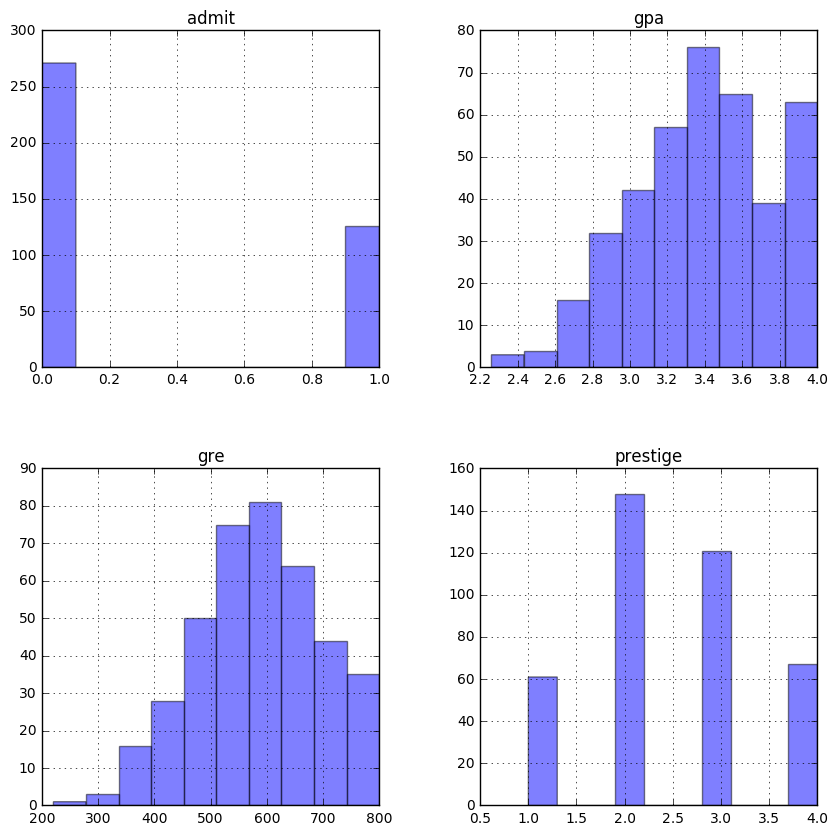

In [176]:
plt.figure()

df3.hist(color=('b'), alpha=.5, bins=10, figsize = (10,10)) 

Bell Curve plots are most appropiate for the GRE and GPA data which are shown below. These charts are best for continuous data.  GRE is discrete because you can only have a whole integer within a certain range, but this data can be treated as continuous and turned into the bell curve plot which has a continuous axis.  It is not appropiate to create a bell curve of the admit and prestige data

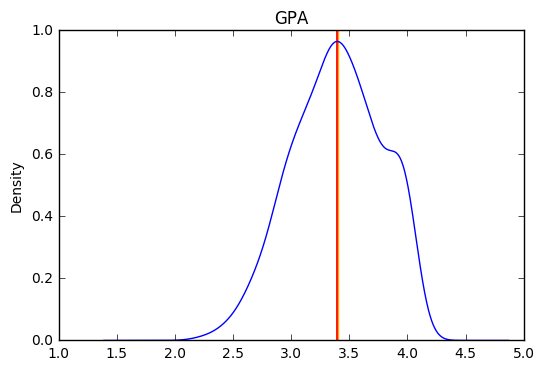

In [259]:
plt.figure()
df3.gpa.plot.kde(title = 'GPA')

plt.vlines(df3.gpa.mean(), ymin = 0, ymax = 1, linewidth = 2.0, color = 'red')
plt.vlines(df3.gpa.median(), ymin = 0, ymax = 1, linewidth = 1.0, color = 'orange')

In viewing the histogram and bell-curve plot for GRE one can observe that GPA values are moved to the right. The values are quite symmetrical but slightly skewed to the right. The skewedness is more prominent in the histogram plot and the data appears a bit more symmetrical in the bell-curve plot. GPA has very high kurtosis, most values are centered around the mean. The median is almost perfectly aligned with the mean as well. 

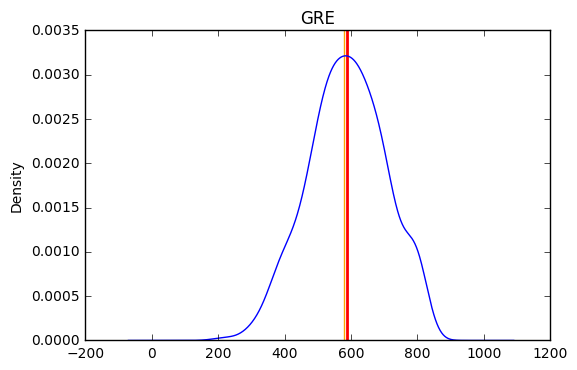

In [258]:
plt.figure()
df3.gre.plot.kde(title = 'GRE')

plt.vlines(df3.gre.mean(), ymin = 0, ymax = 0.0035, linewidth = 2.0, color = 'red')
plt.vlines(df3.gre.median(), ymin = 0, ymax = 0.0035, linewidth = 1.0, color = 'orange')

One can observe in viewing the histogram and bell curve plot of GRE values the data is fairly symmetrical. The mean is slightly to left (greater than) the median.  The data is slightly skewed to the right but is more symmetrical than the plot of GPA.  GRE data is more dispersed than GPA data and has very low kurtosis.  In the bell curve plot it appears to have somewhat normal kurtosis, but notice the $Y$ axis, density is very low. 

#### 3a. How might outliers impact your analysis? 

Answer: <br/>Outliers could affect the mean. Extreme outliers can affect the mean significantly especially the smaller the dataset in number of records. With the admissions dataset the mean could be affected where admittance with a fairly low GPA or GRE could possibly bring down the average significantly enough to appear that lower GREs are acceptable for college admittance. 

#### 3b. How will you test for outliers? 

Answer: <br/>
A.)<br/>
1st - See if there are extremes on either end with the max and min and see how far away these values are in respect to the mean. Determine if these values are outside the interquantile range times the interquantile range <br/>

B.) Test if outliers has an impact or significant impact on the mean.

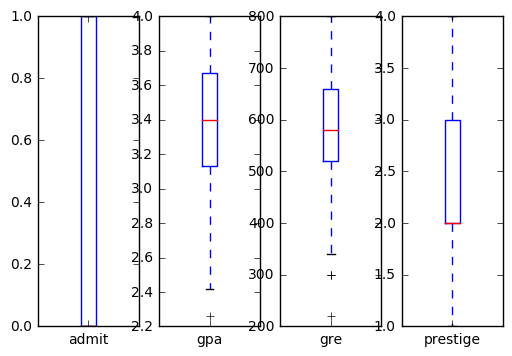

In [247]:
fig, axs = plt.subplots(1,4)
df3.admit.plot.box(ax = axs[0])
df3.gpa.plot.box(ax = axs[1])
df3.gre.plot.box(ax = axs[2])
df3.prestige.plot.box(ax = axs[3])

It makes most sense to visualize the primary data range and outliers with GPA and GRE. 

In [248]:
df3.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Variable | Interquartile Range (IQR) | Upper Limit (Q3)+1.5(IQR) | Lower Limit (Q1)-1.5(IQR)| Min or Max Outside IQR |  Outlier 
---| ---| --- | --- | --- | ----
GRE | 140 | 870 | 310 | 220 | yes
GPA | 1.41 | 5.79 | 1.01 | -- | no 


This **table**, `df3.describe()`, and the corresponding **box plot** above show the where most of the data is concentrated, similar to the bell curve plot.  The ends of the box plot correspond to the percentiles.  As seen in the box plot there is a GRE outliar as indicated by the little "`+`" outside of the "wisker".  This outlier is also found by calculating the upper and lower limits of the interquartile range.  There are no upper limit outliers for this data.  The minimum value of 220 for GRE is an outlier outside of the lower limit. 

In [250]:
df3.shape

(397, 4)

#### 4a. What is collinearity? 

Answer: <br/>Collinearity describes relationships between the data, how values or occurances might result in trends. Observations then can predict other values in the data. Colinearity occurs when there is correlation between the variables to a degree that one can predict the other.

#### 4b. How will you test for colinearity? 

Answer: <br/>The pandas function `DataFrame.corr()` returns a collinearity matrix for the values.  The collinearity value ranges from -1 to 1.  The closer to 0 the less correlation there is. -1 is a perfect anti- correlation and 1 is a perfect correlation. .25 represents a weak positive correlation.  

Also would be good to create the bell curve plot of GRE and GPA when admit = 1 and see the change in that bell curve. 

In [56]:
Correlations = df3.corr()
print Correlations

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


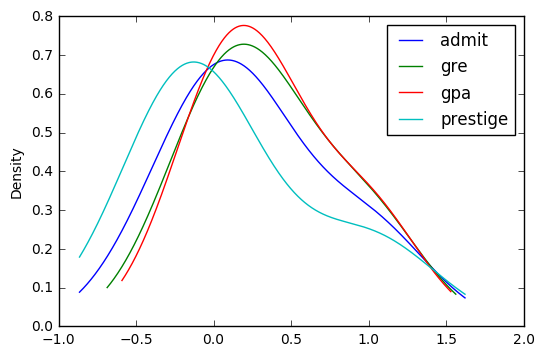

In [11]:
plt.figure()
Correlations.plot.kde()

There is  positive correlation between two covariate variables of GRE and GPA.  There is a negative week correlation between admit and prestige. This is negative because lower value means higher prestige.  So really there is a positive weak correlation between prestige and admissions to the university.  It appears that prestige has the greatest factor in determining rate of success into the university.  

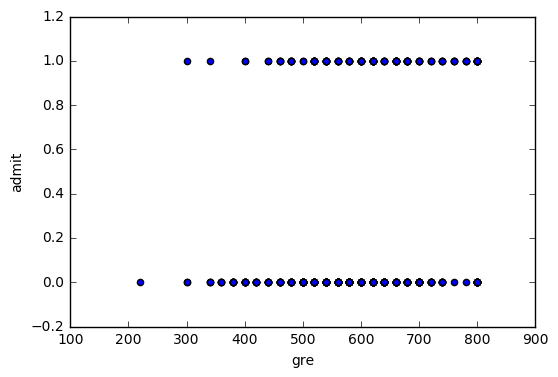

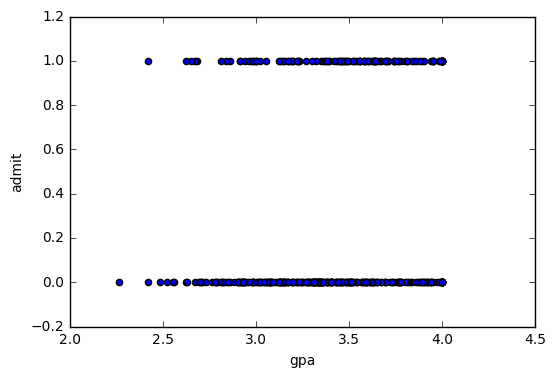

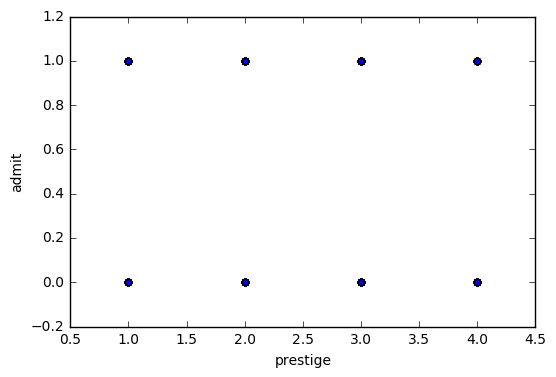

In [255]:
df3.plot.scatter(x = 'gre', y = 'admit')
df3.plot.scatter(x = 'gpa', y = 'admit')
df3.plot.scatter(x = 'prestige', y = 'admit')

Difficult to determine correlation yet without the curvy line from logistic regression that connects the bottom variables to the top success variable. But if there is a strong correlation one would see lower value dots for gre, gpa, and prestige with event = Failure, or when admit = 0, the dots would be more concentrated to the bottom left. One would see higher value dots (to the top right) for gre, gpa, and prestige with admit = 1. At that point correlation would be visibally obvious with out the curvy line thing. 

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer:
1. Describe the data 
 * Write a summary of the data
 * Create a data types and summary table with a short description of each column and the data type
 * How many records and rows. Use `DataFrame.shape`
 * Find how many records have missing data. Use `DataFrame.count()`
2. Determine the predictor variables and covariates. You want to determine the relationship between $X$ and $Y$.  $X$ are the independent variables, the covariates. $Y$ is the dependent variable, which there is only one of, at least in this case.  We want to see if changes in $X$ predict outcomes in $Y$.  The dependent variable here is **admission** of **0 or 1**, with 1 equating to success in admittance in the University.  The independent variables are the scores of **GPA**, **GRE**, and **prestige**
3. Create a Hypothesis.  However, could create a better informed hypothesis after looking at the data a bit more. 
4. Get basic statistics
  * Use `DataFrame.describe()` - This gives you counts, means, medians, standard deviation, minimum value, maximum value and the percentiles
5. Possibly remove null values
6. Check for Outliers
  * See if there are extremes on either end with the max and min and see how far away these values are in respect to the mean. Determine if these values are outside the interquartile range times the interquartile range.
  * Test if outliers has an impact or significant impact on the mean.
5. Understand the distribution and variance of the data
 * Look at the relationship of the standard deviation in respect to the mean by calculating the relative standard deviation.  Higher percentage of relative standard deviation indicate greater distribution
 * Visualize the distribution through plots such as Histograms, Box Plots, and Bell Curve
 * Describe the Bell Curve plot. Is it symmetrical, does it have high kurtosis
6. Create a Logistic Regression Model. Logistic Regression model is used for classification when the dependent variable is binary as in event = Success or event = Failure. Independent variables are chosen to maximize the likelihood of observing Success or Failed event. In the case of the admissions data the 0 = Failure and 1 = Success on the `admit` Column
 * Create dummy variables by assigning if certain value of one column equals a specified parameter = 1 and the other columns then equal 0.  
 * Run regression model. (further instruction on these steps forthcoming)
7. Determine if there is a linear relationship of the independent variables to each other, Not to the dependent variable here because you use a Logistic Regression model when the dependent variables are binary. Use Least Square Liner Regression Method to find Multi-Colinearity.  
 * Create a Scatter Plot
 * If linear, create a best fitting line to the scatter plot
 * Determine R squared - What is the squared distance of the residuals to the line
 * If there is multi-colinearity, remove values that contribute to that ?
 * Use Principle Component Analysis ? 
7. Validate and proof check

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1. To predict the outcome it must be decided to keep or reject the hypothesis.  If the predicted correlation, p-value is close to zero then the hypothesis is rejected. If it is closer to 1 then the hypothesis is strongly supported
2. Combination of higher GRE and higher GPA scores result in more instances of admittance when prestige is lower.
3. Assumptions that when GPA and GRE are higher when prestige is lower when admit = 1.  This reduces the amount of records used in the alternative model.  

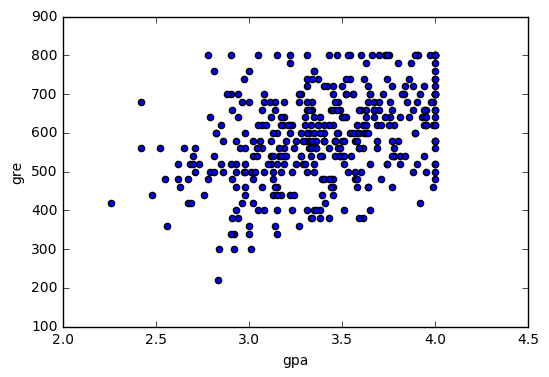

In [257]:
df3.plot.scatter(x = 'gpa', y = 'gre')

Relationship of GRE to GPA - Does higher GPA correspond to higher GRE score?  Yes there does appear to be a positive linear correlation